In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
table_m = Base.classes.measurement
table_s = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
columns = session.query(table_m)
print(columns)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [14]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(table_m.date)).first()[0]
print(recent_date)

2017-08-23


In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_dp = dt.datetime.strptime(recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
date_minus_one_year = most_recent_dp - dt.timedelta(days=365)
date_minus_one_year_dp = dt.datetime.strftime(date_minus_one_year, "%Y-%m-%d")

# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(table_m.date, table_m.prcp).filter(table_m.date >= date_minus_one_year_dp).all()
precipitation_results

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_results, columns = ['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


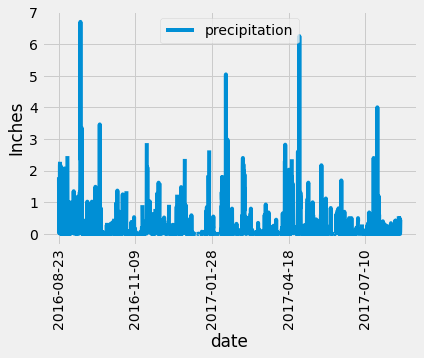

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.show()

In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [73]:
columns2 = session.query(table_s)
print(columns2)

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [76]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(table_s).group_by(table_s.station).count()
station_total

9

In [98]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_active = session.query(table_m.station, func.count(table_m.station)).group_by(table_m.station).order_by(func.count(table_m.station).desc()).all()
station_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temp = session.query(func.min(table_m.tobs), func.max(table_m.tobs), func.avg(table_m.tobs)).filter(table_m.station == 'USC00519281').all()
most_active_temp

[(54.0, 85.0, 71.66378066378067)]

In [104]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_histdata = session.query(table_m.tobs).filter(table_m.station == 'USC00519281').filter(table_m.date >= date_minus_one_year_dp).all()

histogram_data = pd.DataFrame(most_active_histdata, columns = ['tobs'])
histogram_data

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


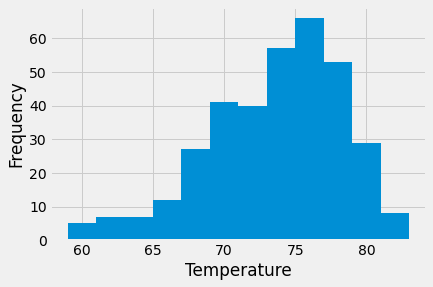

In [115]:
plt.hist(histogram_data["tobs"], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [116]:
# Close Session
session.close()